# EDA on the 2012 Q1 Dataset

In [1]:
import pandas as pd
pd.set_option("display.max_row",500)
pd.set_option("display.max_columns",500)

import warnings
warnings.filterwarnings("ignore")

import numpy as np

quarter = "2012Q1"
directory = "Data/"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

main_color = sns.color_palette("Set2")[0]
default_color = sns.color_palette("Set2")[1]

## Read File

In [3]:
# read the file
filename=directory+"Adjusted_Acquisition_"+quarter+".txt"
col_types={"LOAN_ID":object,"NUM_BO":object,"NUM_UNIT":object,"ZIP_3":object,"MI_TYPE":object}
df = pd.read_csv(filename, sep=",",dtype=col_types)

### Basics

In [4]:
# histogram target
print(df.shape[0])
print(df["target"].value_counts(normalize=True))

637072
no     0.991607
yes    0.008393
Name: target, dtype: float64


In [5]:
test = df.sample(frac=0.1)

In [6]:
test["target"].value_counts(normalize=True)

no     0.991775
yes    0.008225
Name: target, dtype: float64

### Set Feature Types

In [7]:
numeric_vars = ["ORIG_RT","ORIG_AMT","OLTV","OCLTV","DTI","CSCORE_B","ORIG_TRM"]

cat_vars = ["ORIG_CHN","FTHB_FLG","PURPOSE","PROP_TYP","OCC_STAT","MI_TYPE","RELOCATION_FLG","NUM_BO","NUM_UNIT"]

### Numeric Feature Distributions

In [8]:
no_defaults = test.loc[test["target"]=="no"]
defaults = test.loc[test["target"]=="yes"]

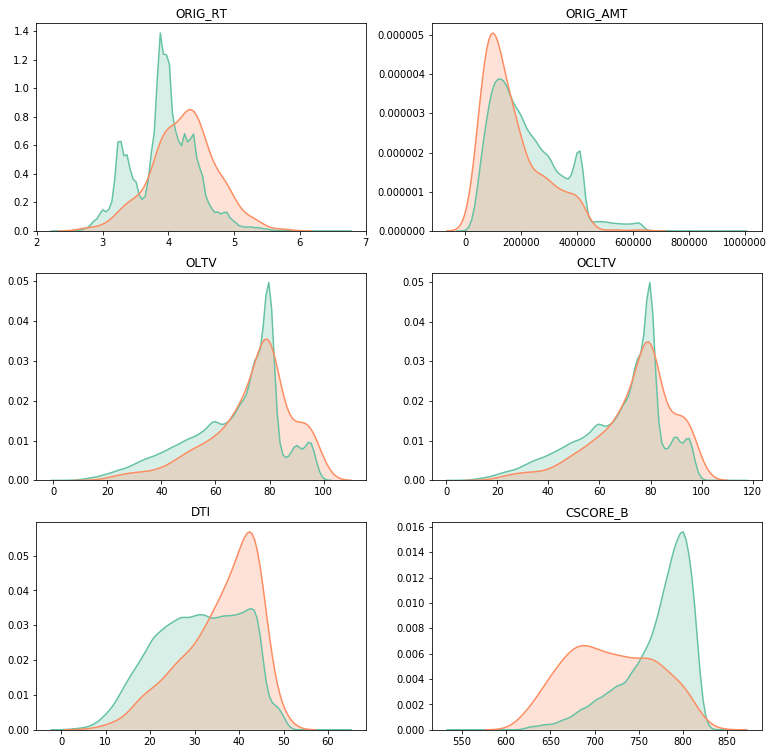

In [9]:
features_to_plot = np.array([["ORIG_RT","ORIG_AMT"],["OLTV","OCLTV"],["DTI","CSCORE_B"]])
fig, ax=plt.subplots(3,2, figsize=(13,13))

for i in range(3):
    for j in range(2):
        sns.kdeplot(no_defaults[features_to_plot[i,j]], ax=ax[i,j], legend=False,
                    shade=True,color=main_color)
        sns.kdeplot(defaults[features_to_plot[i,j]], ax=ax[i,j], legend=False,
                    shade=True,color=default_color)
        ax[i,j].set_title(features_to_plot[i,j])

### Categorical Feature Distributions

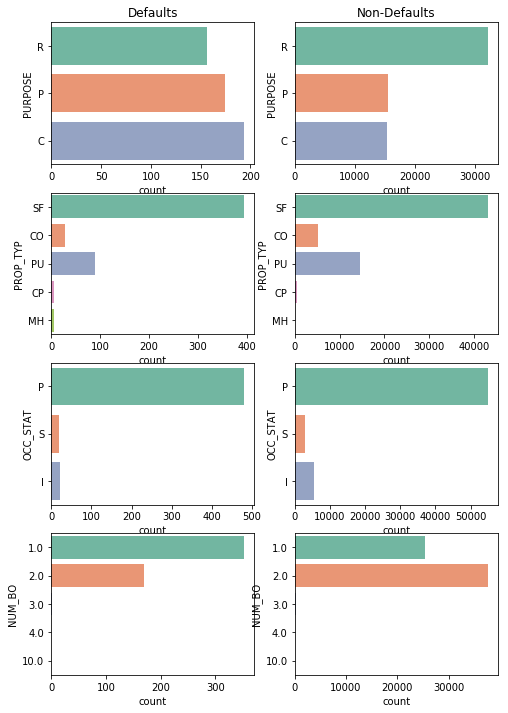

In [15]:
cat_vars_to_plot = ["PURPOSE","PROP_TYP","OCC_STAT","NUM_BO"]

fig, ax=plt.subplots(len(cat_vars_to_plot),2, figsize=(8,12))
ax[0,0].set_title("Defaults")
ax[0,1].set_title("Non-Defaults")

for i, var in enumerate(cat_vars_to_plot):
    sns.countplot(y=var,ax=ax[i,0], data=defaults, palette="Set2",order=test[var].unique())
    sns.countplot(y=var,ax=ax[i,1], data=no_defaults, palette="Set2",order=test[var].unique())

### Correlation Matrix

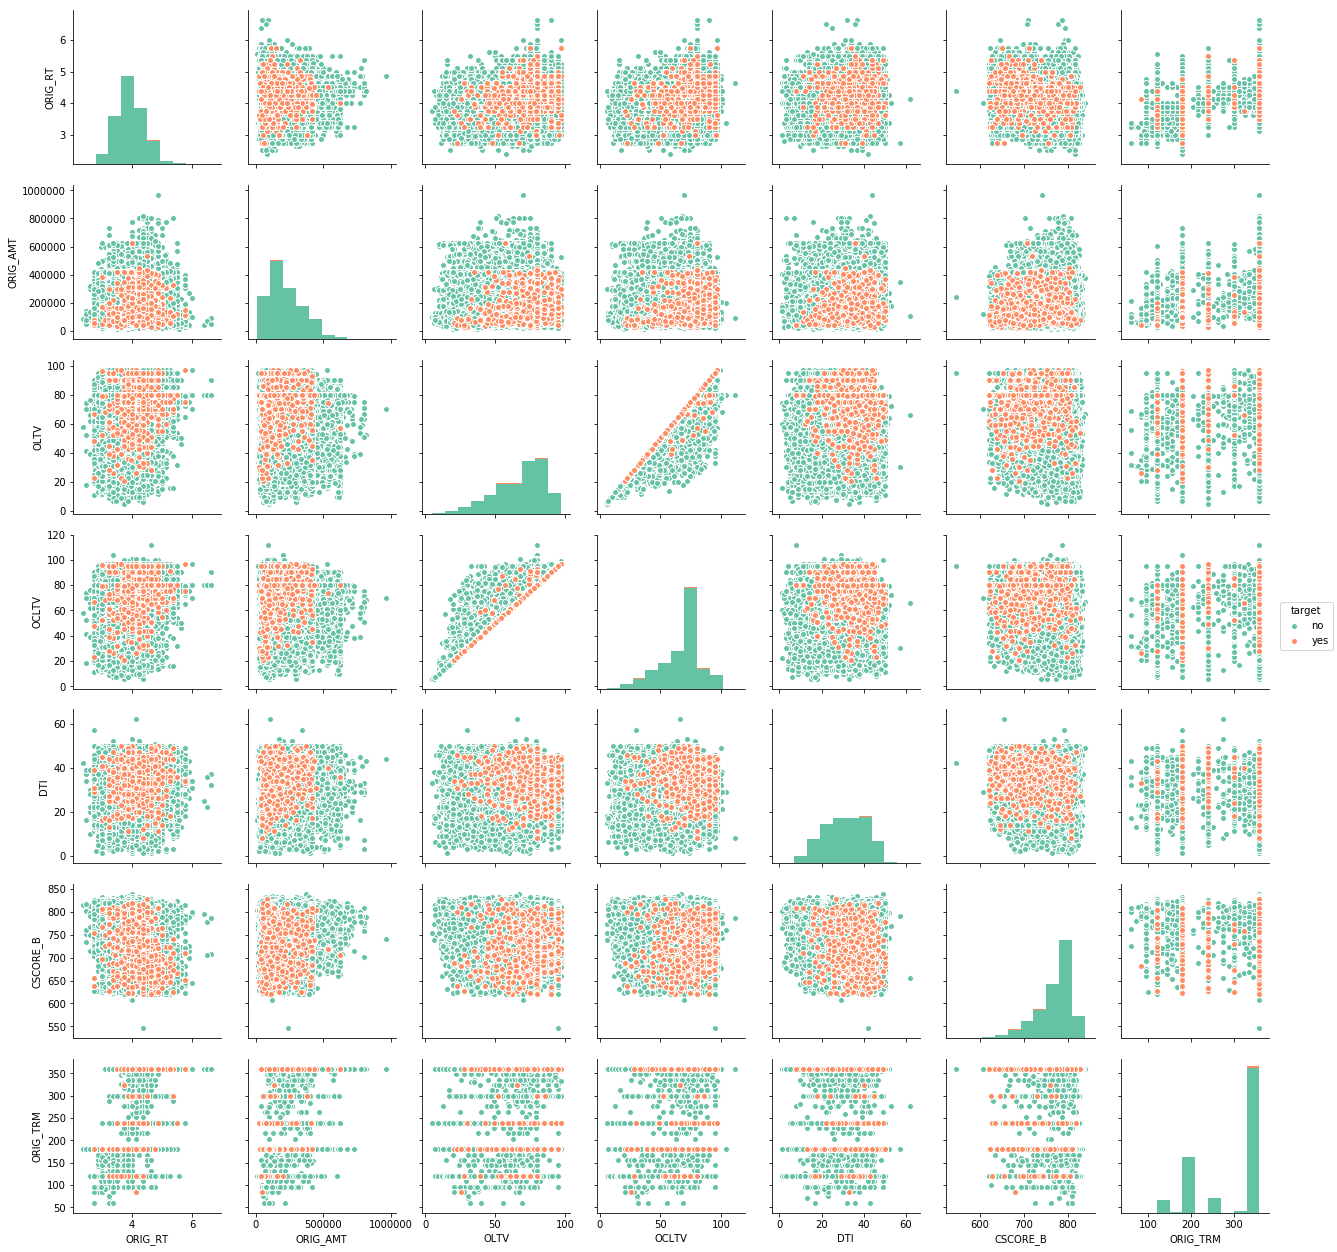

In [11]:
# correlation matrix (from: https://python-graph-gallery.com/111-custom-correlogram/
# left
sns.pairplot(test[numeric_vars+["target"]], kind="scatter", palette="Set2", hue="target")
plt.show()

### Distribution on Two Features

Text(0,0.5,'DTI')

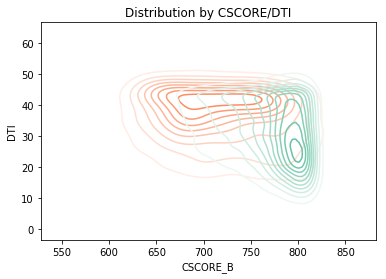

In [12]:
ax = sns.kdeplot(defaults.CSCORE_B,defaults.DTI, legend=False,shade=False,
            cmap=sns.light_palette(default_color,as_cmap=True),shade_lowest=False)

ax = sns.kdeplot(no_defaults.CSCORE_B,no_defaults.DTI, legend=False,shade=False,
            cmap=sns.light_palette(main_color,as_cmap=True),shade_lowest=False)

ax.set_title("Distribution by CSCORE/DTI")
ax.set_xlabel("CSCORE_B")
ax.set_ylabel("DTI")